In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [7]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def fit(self, points_x, points_y):
        X = np.array([[pow(points_x[j], i) for i in range (0, self.max_degree + 1)] for j in range(0, len(points_x))])
        self.result = np.linalg.solve(np.dot(np.transpose(X), X), np.dot(np.transpose(X), points_y)).reshape(1, self.max_degree + 1)
        # insert your code here to fit the model
        
        return self
    
    def predict(self, points_x):
        X = np.array([[pow(points_x[j], i) for i in range(0, self.max_degree + 1)] for j in range(0, len(points_x))])
        values = np.dot(self.result, X.T)
        # insert your code here to predict the values
        
        return values

In [8]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

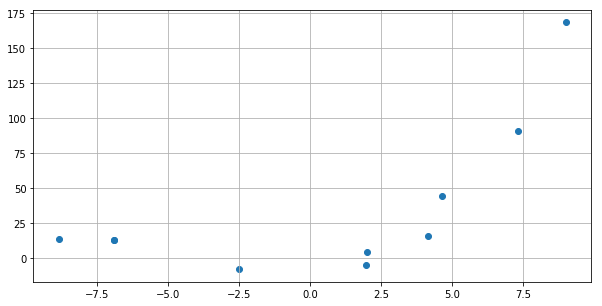

In [9]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [12]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x).reshape(len(all_x), ))
    plt.grid()
    plt.show()

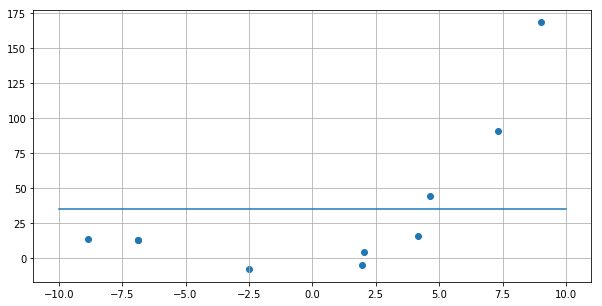

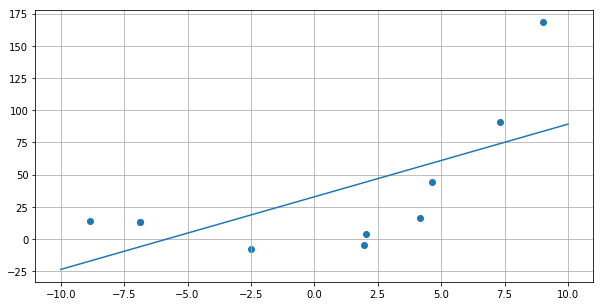

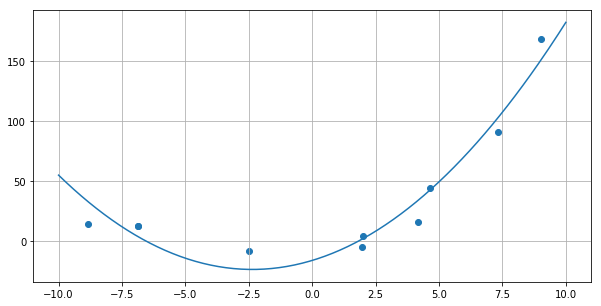

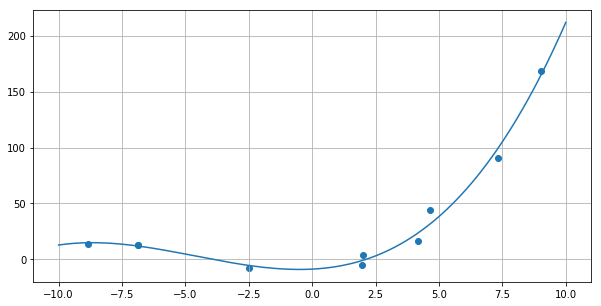

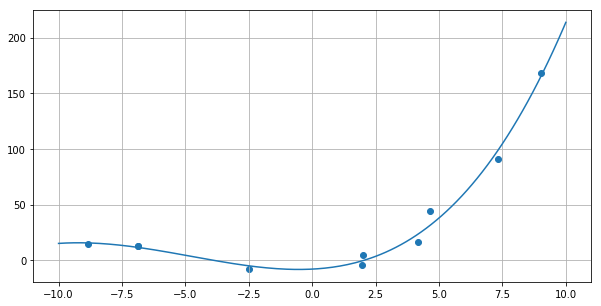

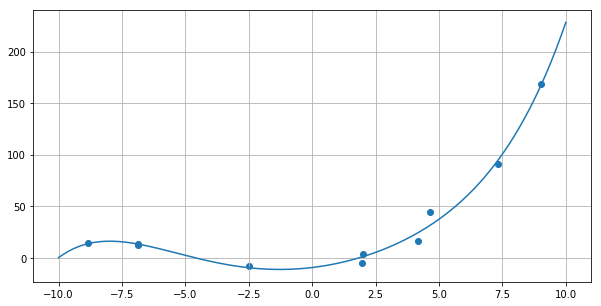

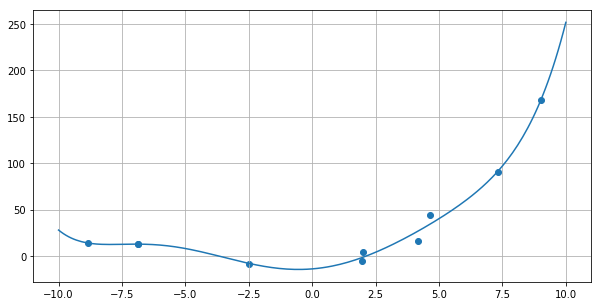

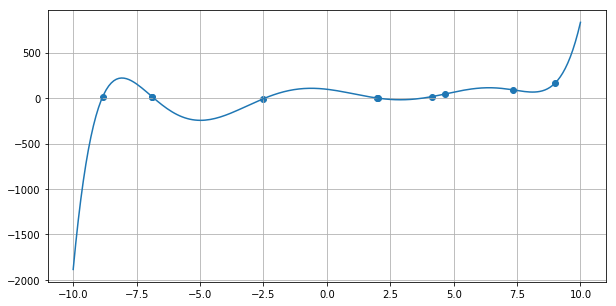

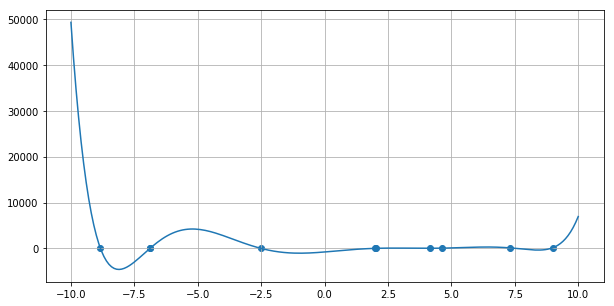

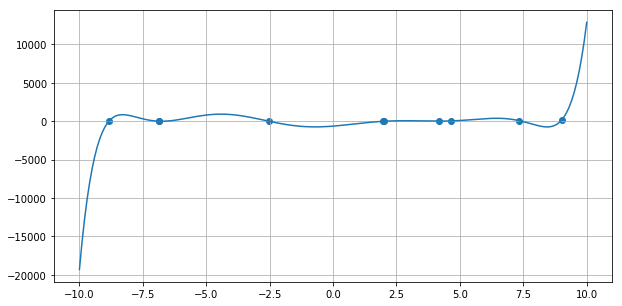

In [13]:
for i in range(10):
    plot_model(i)

Объясните почему графики меняются таким образом

**Значение для формы**

In [14]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

811
